# 환경 변수 로드

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

# 7-1

In [2]:
from langchain_community.utilities import SerpAPIWrapper

# SerpAPI 래퍼 설정
params = {
    "engine": "google_news",  # Google News 엔진 사용
    "gl": "KR",               # 지역 설정 (한국)
    "hl": "ko",               # 언어 설정 (한국어)
}

# SerpAPIWrapper 인스턴스 생성
search = SerpAPIWrapper(params=params)

# '이차전지 산업'에 대한 검색 실행
results = search.run("이차전지 산업")

# 검색 결과 갯수 확인
print(len(results))

97


# 7-2

In [5]:
# 첫 3개 결과를 출력
from pprint import pprint
pprint(results[:3])

[{'date': '10/18/2024, 10:04 AM, +0000 UTC',
  'link': 'https://www.getnews.co.kr/news/articleView.html?idxno=697310',
  'position': 1,
  'source': {'icon': 'https://lh3.googleusercontent.com/xHMaVGij8CwJes0ub_2MFF5JVumqlIQlkOxZXm8gCiElkVXcq27nFSK3AJQgSHSXNiRY7zAL',
             'name': '글로벌경제신문'},
  'thumbnail': 'https://www.getnews.co.kr/news/photo/202410/697310_422127_5635.jpg',
  'title': '이강덕 포항시장, 이차전지 산업 허브로 부상 특별강연'},
 {'date': '10/19/2024, 12:45 AM, +0000 UTC',
  'link': 'https://news.dealsitetv.com/news/articleView.html?idxno=125022',
  'position': 2,
  'source': {'icon': 'https://encrypted-tbn2.gstatic.com/faviconV2?url=https://news.dealsitetv.com&client=NEWS_360&size=96&type=FAVICON&fallback_opts=TYPE,SIZE,URL',
             'name': 'DealSite경제TV'},
  'thumbnail': 'https://cdn.news.dealsitetv.com/news/thumbnail/202410/125022_112723_3132_v150.jpg',
  'title': '이강덕 포항시장 "글로벌 이차전지 R&D 중심 도약"'},
 {'date': '10/18/2024, 05:15 AM, +0000 UTC',
  'link': 'https://www.joongboo.com/ne

# 7-3

In [6]:
url = results[0]['link']
print("url:", url)

url: https://www.getnews.co.kr/news/articleView.html?idxno=697310


# 7-4

In [10]:
# Data Loader - 웹페이지 데이터 가져오기
from langchain_community.document_loaders import WebBaseLoader

# WebBaseLoader 인스턴스 생성
loader = WebBaseLoader(url)

# 웹페이지 데이터 로드
docs = loader.load()

# 로드된 문서 개수 출력
print(len(docs))

# 첫 번째 문서 내용 출력
print(docs[0])

1
page_content='



































이강덕 포항시장, 이차전지 산업 허브로 부상 특별강연

 


















































주요서비스 바로가기
본문 바로가기
매체정보 바로가기
로그인 바로가기
기사검색 바로가기
전체서비스 바로가기



















상단영역

















UPDATED : 2024-10-19 15:20 (토) 





로그인
회원가입













전체메뉴 버튼


검색버튼





검색

검색
검색닫기







글로벌


미주


동남아


유럽


중국


기타


일본


인도




블록체인


암호화폐


블록체인




산업


재계·일반


자동차·항공


전기·전자·IT


유통·물류·패션


식품·제약·의학·바이오


조선·중공업·화학


4차산업




금융


은행


증권


카드


보험


제2금융


핀테크




사회·문화


사회


문화


건강


스포츠


연예


기타




오피니언


칼럼


기자수첩


이슈


인사·부고·동정


교육 & 입시진로




부동산


건설


부동산




경제·정책


경제일반


정치


정책




전국


전국


인천


경기


영남


호남


충청


강원
















본문영역






























 





이전 기사보기
다음 기사보기




이강덕 포항시장, 이차전지 산업 허브로 부상 특별강연


바로가기
복사하기
본문 글씨 줄이기
본문 글씨 키우기






스크롤 이동 상태바








현재위치

 홈
전국
영남


이강덕 포항시장, 이차전지 산업 허브로 부상 특별강연
- 이강덕 시장, 국제 기술교류회서 포항의 배터리 산업 성과와 비전 제시 




기자명 
					김진호 기자				
 입력 2024.10.18 19:04
 수정 20

# 7-5

In [13]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 수정
prompt_template = """다음 텍스트에서 뉴스 본문 내용을 그대로 추출합니다.

[텍스트]
{text}

[추출된 뉴스 본문]
"""
prompt = ChatPromptTemplate.from_template(prompt_template)

# LLM 설정
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 출력 파서
output_parser = StrOutputParser()

# 체인 구성
article_chain = prompt | llm | output_parser

# 체인 실행
article = article_chain.invoke({"text": docs[0].page_content})

# 결과 출력
pprint(article)

('이강덕 포항시장이 18일 인천 그랜드쉐라톤 호텔에서 열린 브레인 링크 기술교류회에서 ‘한국 배터리 산업의 중심, 포항’을 주제로 강연을 '
 '하고 있다.(사진=포항시)\n'
 '\n'
 '포항시가 한국 이차전지 산업의 새로운 중심지로 떠오르고 있다. 이강덕 포항시장은 최근 열린 국제 기술교류회에서 도시의 배터리 산업 성과를 '
 "소개하고 미래 비전을 제시했다. 한국과학기술총연합회가 주최한 '2024 브레인 링크(Brain Link) 기술교류회'가 지난 16일부터 "
 '18일까지 인천 그랜드쉐라톤 호텔에서 개최됐다. 이 행사는 차세대 리튬이차전지 연구 공유 및 네트워킹을 주제로, 국내외 이차전지 '
 '전문가들이 한자리에 모였다.\n'
 '\n'
 "이강덕 시장은 18일 열린 특별강연에서 '한국 배터리 산업의 중심, 포항'이라는 주제로 60여 명의 국내외 전문가들에게 포항의 이차전지 "
 '산업 현황을 설명했다. 그는 지난 10년간 포항이 이차전지 산업을 통해 이룬 경제적 성과를 GRDP와 수출 지표를 들어 소개했다. 이 '
 '시장은 "에코프로 등 대규모 기업 투자와 국책사업 유치로 특화단지와 기업발전특구를 조성했다"고 밝혔다. 또한 "2030년까지 이차전지 '
 '메가 클러스터 조성을 목표로, 이차전지 오픈 이노베이션 센터 구축과 해외 연구소 유치 등을 추진하고 있다"고 덧붙였다.\n'
 '\n'
 '포항시는 2027년 준공 예정인 국제 컨벤션센터 포엑스(POEX)를 통해 국제 이차전지 엑스포, 글로벌 배터리 도시 포럼 등 글로벌 '
 '네트워크 확대 행사를 계획하고 있다. 이는 포항을 세계적인 이차전지 산업 허브로 발전시키기 위한 전략의 일환으로 보인다.\n'
 '\n'
 '이강덕 시장은 "포항시는 포스텍과 함께 이차전지 해외공동연구 프로젝트를 추진하는 등 관련 분야 연구에 최적의 여건을 조성하고 있다"고 '
 '말했다. 그는 또한 "이차전지 인재 양성을 위한 지원을 아끼지 않을 것"이라며, "한국을 넘어 글로벌 이차전지 연구개발의 중심으로 '
 

# 7-6

In [15]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 수정
prompt_template = """다음 뉴스 기사의 주요 요점을 3~5가지 불릿 포인트로 요약하시오.

[뉴스 기사]
{text}

[요약]
- """

prompt = ChatPromptTemplate.from_template(prompt_template)

# LLM 설정
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 출력 파서
output_parser = StrOutputParser()

# 체인 구성
summary_chain = prompt | llm | output_parser

# 체인 실행
summary = summary_chain.invoke({"text": article})

# 결과 출력
print(summary)

- 포항시가 한국 이차전지 산업의 새로운 중심지로 부상하고 있으며, 이강덕 시장이 국제 기술교류회에서 포항의 성과와 비전을 발표했다.
- 포항은 지난 10년간 이차전지 산업을 통해 경제적 성과를 거두었으며, 대규모 기업 투자와 국책사업 유치로 특화단지와 기업발전특구를 조성했다.
- 2030년까지 이차전지 메가 클러스터 조성을 목표로 하며, 오픈 이노베이션 센터 구축과 해외 연구소 유치를 추진하고 있다.
- 2027년 준공 예정인 국제 컨벤션센터 포엑스를 통해 글로벌 네트워크 확대 및 이차전지 관련 행사들을 계획하고 있다.
- 포스텍과의 협력을 통해 해외 공동 연구 프로젝트를 추진하고, 이차전지 인재 양성을 위한 지원을 강화할 예정이다.


# 7-7

In [16]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import CommaSeparatedListOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 수정
prompt_template = """다음 뉴스 기사에서 핵심 키워드를 3~5개 추출하시오. 
키워드는 쉼표로 구분하여 제시하시오.

[뉴스 기사]
{text}

[핵심 키워드]"""

prompt = ChatPromptTemplate.from_template(prompt_template)

# LLM 설정
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 출력 파서 수정
output_parser = CommaSeparatedListOutputParser()

# 체인 구성
keyword_chain = prompt | llm | output_parser

# 체인 실행
keywords = keyword_chain.invoke({"text": article})

# 결과 출력
print(keywords)

['포항시', '이차전지', '배터리 산업', '기술교류회', '글로벌 네트워크']


# 7-8

In [18]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import CommaSeparatedListOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 수정
prompt_template = """다음 뉴스 기사에서 언급된 구체적인 기관명만을 추출하시오. 
일반적인 분류나 카테고리는 제외하고 오직 실제 존재하는 특정 기관, 회사, 조직의 이름만 추출하시오. 
추출된 기관명은 쉼표로 구분하여 제시하시오.

[뉴스 기사]
{text}

[추출된 기관명]"""

prompt = ChatPromptTemplate.from_template(prompt_template)

# LLM 설정
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 출력 파서
output_parser = CommaSeparatedListOutputParser()

# 체인 구성
organization_chain = prompt | llm | output_parser

# 체인 실행
organizations = organization_chain.invoke({"text": article})

# 결과 출력
print(organizations)

['포항시', '한국과학기술총연합회', '에코프로', '포스텍', '포엑스']


# 7-9

In [19]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 템플릿 정의
prompt_template = """다음 뉴스 기사에서 언급된 주요 인물들을 추출하고, 
각 인물의 역할이나 중요성을 간단히 설명하시오. 
결과를 불릿 포인트로 제시하시오.

[뉴스 기사]
{text}

[주요 인물]
- """

# ChatPromptTemplate 객체 생성
prompt = ChatPromptTemplate.from_template(prompt_template)

# LLM 설정
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 체인 구성
people_chain = prompt | llm | StrOutputParser()

# 체인 실행
people = people_chain.invoke({"text": article})

# 결과 출력
print(people)

- **이강덕 포항시장**
  - 포항시의 이차전지 산업 발전을 이끄는 주요 인물로, 국제 기술교류회에서 포항의 배터리 산업 성과와 미래 비전을 발표함.
  - 포항의 경제적 성과를 강조하며, 대규모 기업 투자와 국책사업 유치를 통해 산업 특화단지 조성을 추진하고 있음.
  - 2030년까지 이차전지 메가 클러스터 조성을 목표로 다양한 연구 및 인재 양성 프로젝트를 계획하고 있음.


# 7-10

In [20]:
# 필요한 LangChain 구성 요소 임포트
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 템플릿 정의
# 뉴스 기사에서 주요 사건을 추출하고 타임라인을 생성하도록 지시
prompt_template = """
다음 뉴스 기사에서 언급된 주요 사건들을 시간 순서대로 나열하여 
타임라인을 생성하시오. 
각 사건에 대해 간단한 설명을 포함하시오.

[뉴스 기사]
{text}

[타임라인]
1. """

# ChatPromptTemplate 객체 생성
prompt = ChatPromptTemplate.from_template(prompt_template)

# OpenAI 모델 초기화
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 체인 구성
timeline_chain = prompt | llm | StrOutputParser()

# 체인 실행
timeline = timeline_chain.invoke({"text": article})

# 결과 출력
print(timeline)

1. **2023년 10월 16일 - 브레인 링크 기술교류회 시작**
   - 한국과학기술총연합회 주최로 인천 그랜드쉐라톤 호텔에서 차세대 리튬이차전지 연구 공유 및 네트워킹을 주제로 국제 기술교류회가 개최됨.

2. **2023년 10월 18일 - 이강덕 포항시장 강연**
   - 이강덕 포항시장이 '한국 배터리 산업의 중심, 포항'이라는 주제로 특별강연을 진행하며 포항의 이차전지 산업 현황과 경제적 성과를 소개함.

3. **2023년 10월 18일 - 포항의 이차전지 산업 비전 발표**
   - 이강덕 시장이 포항의 이차전지 메가 클러스터 조성 목표와 관련된 계획(오픈 이노베이션 센터 구축, 해외 연구소 유치 등)을 발표함.

4. **2023년 10월 18일 - 국제 컨벤션센터 포엑스(POEX) 계획**
   - 포항시는 2027년 준공 예정인 국제 컨벤션센터 포엑스를 통해 국제 이차전지 엑스포 및 글로벌 배터리 도시 포럼 등 글로벌 네트워크 확대 행사를 계획하고 있음을 알림.

5. **2023년 10월 18일 - 이차전지 연구 및 인재 양성 강조**
   - 이강덕 시장이 포스텍과의 해외공동연구 프로젝트 및 이차전지 인재 양성을 위한 지원을 강조하며, 포항이 글로벌 이차전지 연구개발의 중심으로 자리매김할 것임을 다짐함.

6. **2023년 10월 18일 - 기술교류회 종료**
   - 이번 기술교류회가 정부출연 연구기관, 기업 부설 연구기관, 대학 및 해외 재외한인과학기술자들이 참여하여 이차전지 분야의 국제 협력을 강화하는 계기가 되었음을 언급하며 마무리됨.


# 7-11

In [21]:
# 필요한 LangChain 구성 요소 임포트
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 템플릿 정의
# 뉴스 기사의 주요 주제와 더 넓은 맥락을 분석하도록 지시
prompt_template = """다음 뉴스 기사와 관련된 주요 주제와 더 넓은 맥락을 분석하시오. 
이 기사가 어떤 큰 그림의 일부인지 설명하고, 관련된 다른 주제나 이슈를 제시하시오.

[뉴스 기사]
{text}

[관련 주제 및 맥락 분석]"""

# ChatPromptTemplate 객체 생성
prompt = ChatPromptTemplate.from_template(prompt_template)

# OpenAI 모델 초기화
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 체인 구성
context_chain = prompt | llm | StrOutputParser()

# 체인 실행
context = context_chain.invoke({"text": article})

# 결과 출력
print(context)

이 뉴스 기사는 포항시가 한국 이차전지 산업의 중심지로 부상하고 있다는 내용을 다루고 있습니다. 이강덕 포항시장이 국제 기술교류회에서 포항의 이차전지 산업 현황과 미래 비전을 발표하며, 포항이 이 분야에서의 성과와 계획을 강조하고 있습니다. 이 기사는 단순히 지역 경제의 발전을 넘어, 한국의 배터리 산업 전반에 대한 중요한 맥락을 제공합니다.

### 주요 주제 분석

1. **이차전지 산업의 중요성**: 이차전지 산업은 전 세계적으로 전기차, 에너지 저장 시스템 등 다양한 분야에서 필수적인 요소로 자리 잡고 있습니다. 한국은 이 분야에서 세계적인 경쟁력을 갖추고 있으며, 포항시는 그 중심지로 부상하고 있습니다.

2. **지역 경제 발전**: 포항시는 이차전지 산업을 통해 경제적 성과를 거두고 있으며, 이는 지역 경제의 활성화와 일자리 창출로 이어집니다. GRDP와 수출 지표를 통해 이러한 성과를 구체적으로 보여주고 있습니다.

3. **글로벌 협력과 네트워킹**: 기술교류회와 같은 국제 행사들은 국내외 전문가들이 모여 지식을 공유하고 협력할 수 있는 기회를 제공합니다. 이는 포항이 글로벌 이차전지 연구개발의 중심으로 자리매김하는 데 중요한 역할을 합니다.

4. **인재 양성과 연구 개발**: 포항시는 이차전지 분야의 인재 양성을 위한 지원을 아끼지 않겠다고 밝혔습니다. 이는 지속 가능한 산업 발전을 위한 필수 요소로, 연구소와 대학 간의 협력도 강조되고 있습니다.

### 더 넓은 맥락

1. **전기차 및 친환경 에너지 전환**: 이차전지 산업의 발전은 전기차의 보급과 밀접한 관련이 있습니다. 전 세계적으로 친환경 에너지로의 전환이 이루어지고 있는 가운데, 이차전지의 수요는 더욱 증가할 것으로 예상됩니다.

2. **국제 경쟁력**: 한국은 중국, 일본 등과 같은 다른 국가들과의 경쟁 속에서 이차전지 산업의 경쟁력을 강화해야 합니다. 포항시의 노력은 이러한 경쟁에서 우위를 점하기 위한 전략의 일환으로 볼 수 있습니다.

3. **지속 가능한 발전**: 

# 7-12

In [22]:
# 필요한 LangChain 구성 요소 임포트
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 템플릿 정의
# 뉴스 기사에서 주요 주장이나 통계를 식별하고 팩트 체크가 필요한 항목을 평가하도록 지시
prompt_template = """
다음 뉴스 기사에서 주요 주장이나 통계를 식별하고, 
각각에 대해 추가적인 팩트 체크나 출처 확인이 필요한지 평가하시오. 
결과를 불릿 포인트로 제시하시오.

[뉴스 기사]
{text}

[팩트 체크 필요 항목]
- """

# ChatPromptTemplate 객체 생성
prompt = ChatPromptTemplate.from_template(prompt_template)

# OpenAI 모델 초기화
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 체인 구성
factcheck_chain = prompt | llm | StrOutputParser()

# 체인 실행
factcheck = factcheck_chain.invoke({"text": article})

# 결과 출력
print(factcheck)

- **포항시가 한국 이차전지 산업의 새로운 중심지로 떠오르고 있다**  
  - 추가 팩트 체크 필요: 포항시의 이차전지 산업 관련 통계나 성과에 대한 구체적인 데이터와 비교 분석이 필요하다. 다른 지역과의 비교를 통해 '중심지'라는 주장의 타당성을 평가할 수 있다.

- **이강덕 시장이 지난 10년간 포항이 이차전지 산업을 통해 이룬 경제적 성과를 GRDP와 수출 지표를 들어 소개했다**  
  - 추가 팩트 체크 필요: GRDP와 수출 지표의 구체적인 수치와 출처를 확인해야 한다. 이 수치들이 포항의 이차전지 산업에 특화된 것인지, 전체 경제에 대한 것인지 명확히 할 필요가 있다.

- **에코프로 등 대규모 기업 투자와 국책사업 유치로 특화단지와 기업발전특구를 조성했다**  
  - 추가 팩트 체크 필요: 에코프로의 투자 규모와 국책사업의 구체적인 내용 및 성과를 확인해야 한다. 이 정보는 포항의 이차전지 산업 발전에 대한 신뢰성을 높이는 데 중요하다.

- **2030년까지 이차전지 메가 클러스터 조성을 목표로 하고 있다**  
  - 추가 팩트 체크 필요: 메가 클러스터의 구체적인 계획과 예산, 참여 기업 및 기관에 대한 정보가 필요하다. 이 목표의 실현 가능성을 평가하기 위해서는 구체적인 실행 계획이 필요하다.

- **2027년 준공 예정인 국제 컨벤션센터 포엑스(POEX)**  
  - 추가 팩트 체크 필요: POEX의 건설 진행 상황과 예산, 목적 및 기대 효과에 대한 정보가 필요하다. 이 센터가 포항의 이차전지 산업에 미칠 영향에 대한 분석이 필요하다.

- **포스텍과 함께 이차전지 해외공동연구 프로젝트를 추진하고 있다**  
  - 추가 팩트 체크 필요: 이 연구 프로젝트의 구체적인 내용, 참여 기관, 연구 목표 및 성과에 대한 정보가 필요하다. 연구의 실질적인 기여도를 평가하기 위해서는 구체적인 데이터가 필요하다.

- **한국을 넘어 글로벌 이차전지 연구개발의 중심으로 자리매김하기 위해 행정력을 집중하겠다**  
  - 추가 팩트 

# 7-13

In [23]:
# 필요한 LangChain 구성 요소 임포트
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# 프롬프트 템플릿 정의
# 뉴스 기사의 감정 톤을 분석하도록 지시
prompt_template = """
다음 뉴스 기사의 전반적인 감정 톤을 분석하시오. 
긍정적, 부정적, 중립적 중 하나로 분류하고, 그 이유를 간단히 설명하시오.

[뉴스 기사]
{text}

[감정 분석 결과]"""

# ChatPromptTemplate 객체 생성
prompt = ChatPromptTemplate.from_template(prompt_template)

# OpenAI 모델 초기화
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 감정 분석을 위한 체인 구성
sentiment_chain = prompt | llm | StrOutputParser()

# 체인 실행
sentiment = sentiment_chain.invoke({"text": article})

# 분석 결과 출력
print(sentiment)

이 뉴스 기사의 전반적인 감정 톤은 **긍정적**으로 분류할 수 있습니다.

**이유:** 기사에서는 포항시가 한국 이차전지 산업의 중심지로 떠오르고 있다는 긍정적인 발전을 강조하고 있습니다. 이강덕 시장의 강연 내용과 포항의 경제적 성과, 대규모 기업 투자 및 국책사업 유치 등의 성과가 언급되며, 포항의 미래 비전과 계획이 긍정적으로 제시되고 있습니다. 또한, 국제 기술교류회와 같은 행사들이 포항의 글로벌 네트워크 확대와 연구개발에 기여할 것이라는 기대감이 드러나 있어, 전반적으로 긍정적인 분위기를 형성하고 있습니다.


# 7-14

In [24]:
from pydantic import BaseModel, Field
from typing import List
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import PydanticOutputParser

# Pydantic 데이터 모델 
class NewsAnalysis(BaseModel):
    summary: List[str] = Field(description="뉴스 기사의 주요 요점 (3-5개의 불릿 포인트)")
    keywords: List[str] = Field(description="핵심 키워드 (3-5개)")
    organizations: List[str] = Field(description="언급된 기관명 목록")
    sentiment: str = Field(description="기사의 전반적인 감정 톤 (긍정적/부정적/중립적)")
    main_people: List[str] = Field(description="주요 인물 목록")

# LLM 설정
llm = ChatOpenAI(temperature=0, model_name="gpt-4o-mini")

# 구조화 출력 설정 
news_analysis_llm = llm.with_structured_output(NewsAnalysis)

# 통합 프롬프트 템플릿
prompt_template = """다음 뉴스 기사를 분석하여 요청된 정보를 제공하시오.

[뉴스 기사]
{text}

분석 결과:"""

prompt = ChatPromptTemplate.from_template(prompt_template)

# 체인 구성
analysis_chain = prompt | news_analysis_llm

# 체인 실행
news_analysis = analysis_chain.invoke({"text": article})

# 결과 출력
print(news_analysis)

summary=['포항시가 한국 이차전지 산업의 새로운 중심지로 부상하고 있다.', '이강덕 포항시장이 국제 기술교류회에서 포항의 배터리 산업 성과와 미래 비전을 발표했다.', '2030년까지 이차전지 메가 클러스터 조성을 목표로 하고 있다.', '포항시는 국제 컨벤션센터 포엑스(POEX)를 통해 글로벌 네트워크 확대를 계획하고 있다.', '이차전지 인재 양성을 위한 지원을 아끼지 않겠다고 강조했다.'] keywords=['포항시', '이차전지', '기술교류회', '메가 클러스터', '글로벌 네트워크'] organizations=['한국과학기술총연합회', '포스텍', '정부출연 연구기관'] sentiment='긍정적' main_people=['이강덕 포항시장']


# 7-15

In [26]:
print("summary:")
pprint(news_analysis.summary)
print("keywords:")
pprint(news_analysis.keywords)
print("organizations:")
pprint(news_analysis.organizations)
print("sentiment:")
pprint(news_analysis.sentiment)
print("main_people:")
pprint(news_analysis.main_people)

summary:
['포항시가 한국 이차전지 산업의 새로운 중심지로 부상하고 있다.',
 '이강덕 포항시장이 국제 기술교류회에서 포항의 배터리 산업 성과와 미래 비전을 발표했다.',
 '2030년까지 이차전지 메가 클러스터 조성을 목표로 하고 있다.',
 '포항시는 국제 컨벤션센터 포엑스(POEX)를 통해 글로벌 네트워크 확대를 계획하고 있다.',
 '이차전지 인재 양성을 위한 지원을 아끼지 않겠다고 강조했다.']
keywords:
['포항시', '이차전지', '기술교류회', '메가 클러스터', '글로벌 네트워크']
organizations:
['한국과학기술총연합회', '포스텍', '정부출연 연구기관']
sentiment:
'긍정적'
main_people:
['이강덕 포항시장']


# 7-16

In [27]:
import pandas as pd
from langchain.document_loaders import WebBaseLoader
from tqdm import tqdm
import time

def scrape_and_combine(results):
    new_results = []
    for result in tqdm(results):
        try:
            url = result['link']
            # WebBaseLoader를 사용하여 웹 페이지 내용 로드
            loader = WebBaseLoader(url)
            docs = loader.load()
            text = docs[0].page_content
            # 뉴스 본문을 추출 (article_chain은 별도로 정의되어야 함)
            article = article_chain.invoke({"text": text})
            
            # 결과를 딕셔너리 형태로 저장
            new_result = {
                'title': result.get('title', ''),
                'link': url,
                'snippet': result.get('snippet', ''),
                'source': result.get('source', ''),
                'date': result.get('date', ''),
                'content': article
            }
            new_results.append(new_result)
        except Exception as e:
            print(f"Error processing {url}: {str(e)}")
        
        # 웹사이트에 부담을 주지 않기 위한 지연
        time.sleep(1)

    return new_results

# SerpAPI 결과를 사용하여 스크래핑 및 결과 결합 - 3개의 뉴스만 처리 
combined_results = scrape_and_combine(results[:3])

# pandas DataFrame 생성
df = pd.DataFrame(combined_results)

# 결과 확인
print("DataFrame 행 수:", len(df))
print("\nDataFrame 미리보기:")
print(df.head())

100%|██████████| 3/3 [00:25<00:00,  8.43s/it]

DataFrame 행 수: 3

DataFrame 미리보기:
                               title  \
0      이강덕 포항시장, 이차전지 산업 허브로 부상 특별강연   
1      이강덕 포항시장 "글로벌 이차전지 R&D 중심 도약"   
2  과천시, LG에너지솔루션과 이차전지 산업 상생발전 협약 체결   

                                                link snippet  \
0  https://www.getnews.co.kr/news/articleView.htm...           
1  https://news.dealsitetv.com/news/articleView.h...           
2  https://www.joongboo.com/news/articleView.html...           

                                              source  \
0  {'name': '글로벌경제신문', 'icon': 'https://lh3.googl...   
1  {'name': 'DealSite경제TV', 'icon': 'https://encr...   
2  {'name': '중부일보', 'icon': 'https://encrypted-tb...   

                              date  \
0  10/18/2024, 10:04 AM, +0000 UTC   
1  10/19/2024, 12:45 AM, +0000 UTC   
2  10/18/2024, 05:15 AM, +0000 UTC   

                                             content  
0  이강덕 포항시장이 18일 인천 그랜드쉐라톤 호텔에서 열린 브레인 링크 기술교류회에서...  
1  이강덕 포항시장이 ‘2024 브레인 링크(Brain Link) 기술교류회’에 참석한...  
2  과천

# 7-17

In [29]:
import json 

# source 열에서 icon과 name 추출
df['source_dict'] = df['source'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
df['source_icon'] = df['source_dict'].apply(lambda x: x.get('icon') if isinstance(x, dict) else None)
df['source_name'] = df['source_dict'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# 임시 열 삭제
df = df.drop('source_dict', axis=1)

# 결과 확인
print("DataFrame 행 수:", len(df))
print("\nDataFrame 열:", df.columns)
print("\nDataFrame 미리보기:")
print(df[['title', 'source_icon', 'source_name']].head())

DataFrame 행 수: 3

DataFrame 열: Index(['title', 'link', 'snippet', 'source', 'date', 'content', 'source_icon',
       'source_name'],
      dtype='object')

DataFrame 미리보기:
                               title  \
0      이강덕 포항시장, 이차전지 산업 허브로 부상 특별강연   
1      이강덕 포항시장 "글로벌 이차전지 R&D 중심 도약"   
2  과천시, LG에너지솔루션과 이차전지 산업 상생발전 협약 체결   

                                         source_icon   source_name  
0  https://lh3.googleusercontent.com/xHMaVGij8CwJ...       글로벌경제신문  
1  https://encrypted-tbn2.gstatic.com/faviconV2?u...  DealSite경제TV  
2  https://encrypted-tbn3.gstatic.com/faviconV2?u...          중부일보  


# 7-18

In [30]:
# CSV 파일로 저장 
df.to_csv('news_articles.csv', index=False, encoding='utf-8-sig')
print("\nCSV 파일로 저장됨: news_articles.csv")


CSV 파일로 저장됨: news_articles.csv


# 7-19

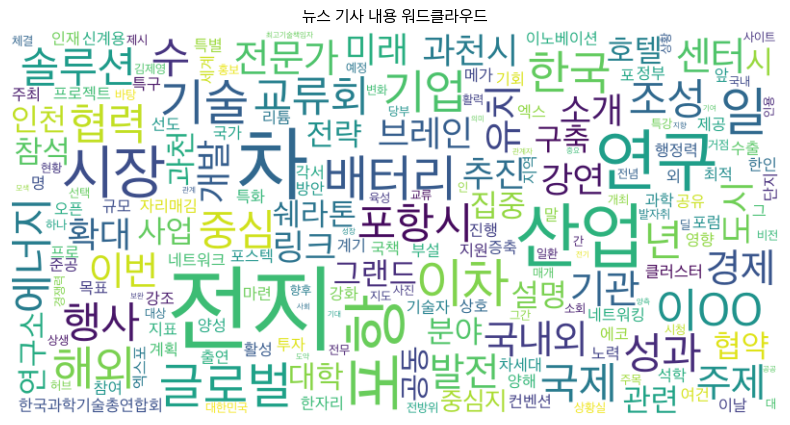

In [55]:
import os
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
from kiwipiepy import Kiwi

# 운영 체제별 폰트 경로 설정
system = platform.system()

# 윈도우의 맑은 고딕 폰트
if system == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  

# macOS의 Apple SD Gothic Neo 폰트
elif system == 'Darwin':  
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'  

# Linux의 경우 (우분투 기준)
else:
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  

# 폰트 파일 존재 여부 확인
if not os.path.exists(font_path):
    raise FileNotFoundError(f"폰트 파일을 찾을 수 없습니다: {font_path}")

# matplotlib 폰트 설정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# Kiwi 토크나이저 초기화
kiwi = Kiwi()

# 한국어 텍스트 전처리 함수 (명사만 추출)
def preprocess_text(text):
    tokens = kiwi.analyze(text)[0][0]
    return ' '.join([token.form for token in tokens if token.tag.startswith('N')]) 

# 불용어 정의
stopwords = set(['을', '를', '이', '가', '은', '는', '한', '것', '있', '없', '등'])

# 텍스트 전처리
preprocessed_text = ' '.join(df['content'].apply(preprocess_text))

# 단어 빈도 계산
words = preprocessed_text.split()
word_count = Counter(words)

# 불용어 제거
for stopword in stopwords:
    word_count.pop(stopword, None)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path, 
    width=800, 
    height=400, 
    background_color='white',
    max_font_size=100
).generate_from_frequencies(word_count)

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('뉴스 기사 내용 워드클라우드')
plt.show()